# **PyTorch**

* PyTorch is the premier open-source deep learning framework developed and maintained by Facebook, based on Torch which is an open-source project for deep learning written in C and generally used via the Lua interface.

* PyTorch is a mathematical library that allows you to perform efficient computation and automatic differentiation on graph-based models.

## Installing PyTorch

https://pytorch.org/get-started/locally/


In [1]:
import torch
print(torch.__version__)

2.1.0


## PyTorch tensors

Whereas `numpy` used `np.array` as the basic data structure, in `PyTorch` we will use the similar `torch.Tensor` which you can think of in the same way. The big difference is that `torch.Tensor` can also be moved to the GPU, where they use a library called `CUDA` under the hood to do calculations

In [2]:
a = torch.Tensor([1,2,3])
c = torch.tensor([1,2,3],dtype=torch.int32)
W = torch.randn(3,3)
b = torch.Tensor(([4,5,6],[4,7,9])).view(6,1) #### changing the size in pytorch
print('a= ',  a)
print('c= ',  c)
print('w =' , W)
print('b =',b)

a=  tensor([1., 2., 3.])
c=  tensor([1, 2, 3], dtype=torch.int32)
w = tensor([[-0.7165,  0.1876,  0.3539],
        [ 1.5854,  0.8106, -0.3749],
        [ 0.6893, -2.2346,  0.0773]])
b = tensor([[4.],
        [5.],
        [6.],
        [4.],
        [7.],
        [9.]])


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
a = a.to(device)
b = b.to(device)
c = torch.ones(3, device=device)
d = a + b + c
print(d.device)

cpu


In [4]:
torch.cuda.is_available()

False

## Iris Classification in PyTorch

Let's load  `iris.txt` using the `sklearn` library, we can then preprocess the labels and convert them to one hot encoding

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = datasets.load_iris()

# separate into train/test using sklearn
(x_train, x_test, y_train, y_test) = train_test_split(iris.data, iris.target)

num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_features = x_train.shape[1]
num_classes = 3

# lets also convert our targets y to a one-hot encoding
# e.g. 1 -> [0, 1, 0], 2 -> [0, 0 ,1]
one_hot = OneHotEncoder(sparse=False)
y_train = one_hot.fit_transform(y_train.reshape(-1,1))
y_test = one_hot.transform(y_test.reshape(-1,1))

c:\Users\charl\anaconda3\envs\ecse-551\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

Finally, we'll convert our data to `torch.Tensor` representations, and because we can only have operations between arguments of the same type, lets make everything a `float` as well

In [7]:
x_train = torch.from_numpy(x_train).float().to(device)
x_test = torch.from_numpy(x_test).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

## PyTorch Autograd

So far when doing gradient descent for various ML models we would compute the gradients manually to do the update. While this would be possible for very simple neural networks with no hidden layer, it would become very complicated and bothersome to do backpropagation for complex, deep neural networks.

To this end, we'd like to just build our neural network and have our library calculate the gradients necessary for backpropogation itself! `PyTorch` does this with `autograd` which keeps track of all your operations and the gradients associated with them.

To do this, we set `requires_grad = True` for the tensors we want to keep track of, and call `loss.backward()` to populate the `.grad` part of each tensor. In our case, this will be the `weights`.

We are going to show it in a very simple network for iris classification with MSE error.

In [14]:
### We initialize weights and parameters
torch.manual_seed(0)
torch.cuda.manual_seed(0)
# set requires_grad = True to track the gradients
weights = torch.randn(num_features, num_classes, device=device, requires_grad=True)

learning_rate = 2e-5
num_epochs = 5000

losses = []

### We now perform Gradient Descent

for epoch in range(num_epochs):

    # QUESTION : compute the predictions and MSE loss
    # (Hint : torch.mm(x,y) is matrix multiplication in PyTorch)
    preds = torch.mm(x_train, weights) # predictions
    loss = (preds - y_train).pow(2).mean() # MSE loss
    losses.append(loss.item())

    ### AUTO gradients computation
    loss.backward()

    ### Update the weights without changing the gradients
    with torch.no_grad():
      # access the gradient with weights.grad
      weights -= learning_rate * weights.grad

      # make sure to reset the gradient to 0 for our next calculation
      weights.grad.zero_()

In [12]:
loss.item()

80.96249389648438

Text(0, 0.5, 'mean squared loss')

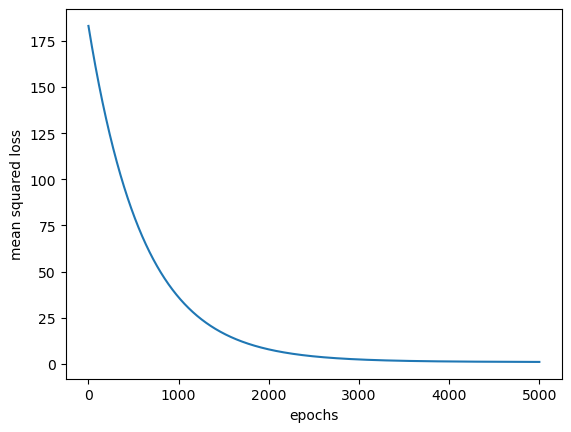

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('mean squared loss')

## PyTorch Optimizers

We can make our code even simpler by letting the library do the gradient updates as well! Using `torch.optim` we can choose from a variety of optimization strategies, and in this case, we can use regular `SGD`. We have to specify all the parameters we wish to optimize, so in this case it is just `weights`

Text(0, 0.5, 'mean squared loss')

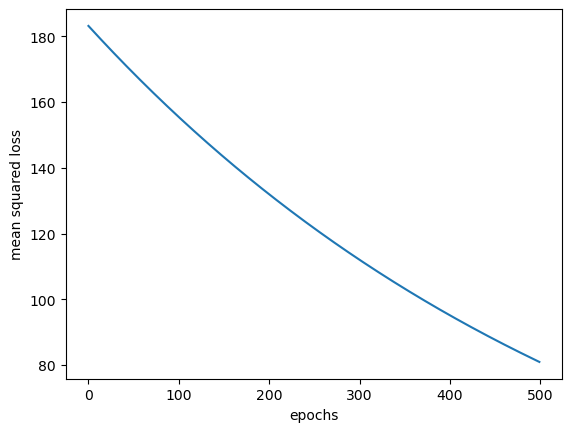

In [16]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
weights = torch.randn(num_features, num_classes, device=device, requires_grad=True)

learning_rate = 2e-5
num_epochs = 500
losses = []

# set the optimizer
optimizer = torch.optim.SGD([weights], lr=learning_rate)

for epoch in range(num_epochs):

    preds = torch.mm(x_train, weights)
    loss = (preds - y_train).pow(2).mean()
    losses.append(loss.item())

    # make sure to reset the gradients to 0 before calculation
    optimizer.zero_grad()
    loss.backward()
    # update our parameter with SGD
    optimizer.step()

plt.plot(range(num_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('mean squared loss')

## PyTorch NN

Now nearly everything is in place, except it would still be a bit of a hassle to explicitly write out all the weights, biases, and other parameters we want to optimize. This is especially true since there are a lot of very common neural network building blocks that we use all the time. The `torch.nn` part of the libary is exactly that! It gives us all the tools to write our models at a higher level, going over the small details

Here, we will replace:
- `weights` with `nn.Linear` layer.

   nn. Linear(n,m) is a module that creates single layer feed forward network with n inputs and m output. Mathematically, this module is designed to calculate the linear equation Ax = b
- our optimizer's listing of parameters with `model.parameters()`
- our manual loss calculation with `nn.MSELoss`

Text(0, 0.5, 'mean squared loss')

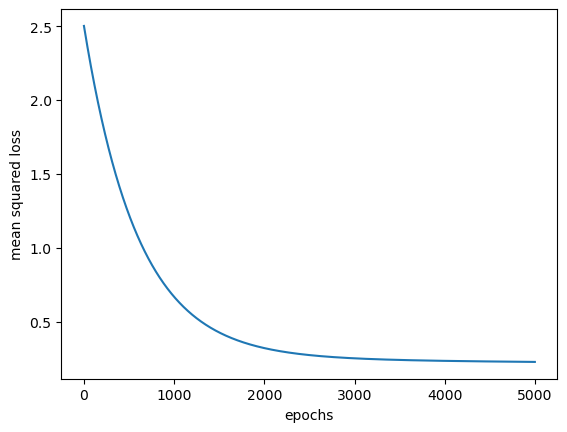

In [18]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

# define your model
model = torch.nn.Linear(num_features, num_classes).to(device)
# choose a loss function
loss_fn = torch.nn.MSELoss()

num_epochs = 5000
learning_rate = 2e-5
# automatically find all your model's parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

for epoch in range(num_epochs):
    preds = model(x_train)
    loss = loss_fn(preds, y_train)

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


plt.plot(range(num_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('mean squared loss')

There are other types of layers besides `nn.Linear`. For example, we can add a non-linear activation such as reLU with `nn.ReLU`, or add a convolution layer with `nn.Conv2d` (as we will see later today)

## PyTorch nn.Sequential
Most of the time we want to build multi-layer neural networks. PyTorch lets us do that by using [nn.Sequential](https://pytorch.org/docs/stable/nn.html?#sequential), which wraps a sequence of layers together and turns them into one big model.

Text(0, 0.5, 'mean squared loss')

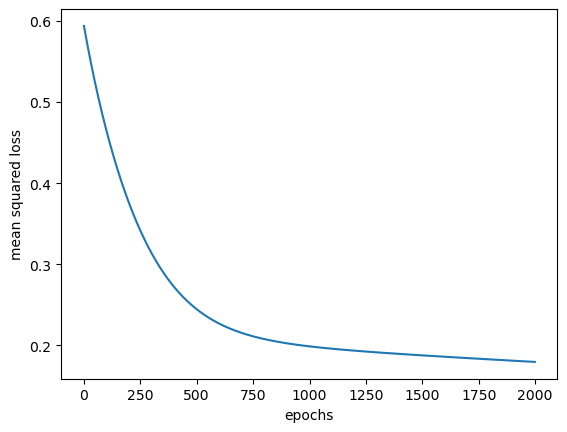

In [19]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)


model = torch.nn.Sequential(
    torch.nn.Linear(num_features, 4),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4, num_classes)
).to(device)

loss_fn = torch.nn.MSELoss()

num_epochs = 2000
learning_rate = 2e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

for epoch in range(num_epochs):
    preds = model(x_train)
    loss = loss_fn(preds, y_train)

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


plt.plot(range(num_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('mean squared loss')

## Challenge

We're now doing really well on the `iris` dataset mainly because it is so simple and neural networks are so powerful! Let's work on something a bit harder, and try our hands on the sklearn Digits dataset. This dataset contains images of handwritten digits, similarly to the famous MNIST, but with smaller dimension and size (to simplify the code in the scope of this demo)

There are 1797 images. The input images are handwritten digits (0 - 9) in a 8x8 pixel grayscale image. This means the input is a Tensor of size `1797 x 64` where each value is an "intensity" (how dark the pixel is) number between 0 and 255 (inclusive) . The output is the number that this handwritten image is showing, so between 0 and 9.

We now try using neural networks coded in PyTorch to handle this classification task. The loss function we use is softmax cross entropy (look [here](https://pytorch.org/docs/stable/nn.html?#loss-functions)).
The following code cell has an example of decently performing neural net. It is now your turn to play with the architecture and hyperparameters and see how it affects training score, test score, computation speed, etc. Try to improve the performances !

You can play with :

* number of layers
* number of neurons per layers
* device (cpu vs cuda, how does it impact speed ?)
* adding non-linear layers between linear layers (e.g. ReLU, but there are others)
* learning rate
* number of epochs
* loss function

Note that the dataset has a small number of samples and we are not using convolution layers (which are more adapted to images and which we will study next week), so the performance will have some limitations.

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### Load Digits dataset

digits = datasets.load_digits()
(x_train, x_test, y_train, y_test) = train_test_split(digits.data, digits.target)
num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_features = x_train.shape[1]
num_classes = 10
one_hot = OneHotEncoder(sparse=False) #n_values=num_classes,
x_train = torch.from_numpy(x_train).float().to(device)
x_test = torch.from_numpy(x_test).float().to(device)
y_train = torch.from_numpy(y_train).long().to(device)
y_test = torch.from_numpy(y_test).long().to(device)

### Hyperparameters & architecture

model = nn.Sequential(
    nn.Linear(num_features, 200),
    nn.ReLU(),
    nn.Linear(200, 500),
    nn.Sigmoid(),
    nn.Linear(500, 500),
    nn.ReLU(),
    nn.Linear(500, num_classes),
).to(device)

num_epochs = 10000
learning_rate = 2e-5
loss_fn = nn.CrossEntropyLoss()

### Training

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
losses = []

for epoch in range(num_epochs):

    preds = model(x_train)
    loss = loss_fn(preds, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Results

plt.plot(range(num_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('crossentropy loss')

preds_train = model(x_train)
acc = 0
for i in range(len(y_train)):
  if torch.argmax(preds_train[i]) == y_train[i]:
    acc += 1
print('train accuracy : {}'.format(acc / len(y_train)))

preds_test = model(x_test)
acc = 0
for i in range(len(y_test)):
  if torch.argmax(preds_test[i]) == y_test[i]:
    acc += 1
print('test accuracy : {}'.format(acc / len(y_test)))


KeyboardInterrupt: 

# **Convolutional Neural Networks**
In the following you will see how to read the provided files for the mini-project 3.
First you will see how to read each of the provided files. Then, you will see a more elegant way of using this data for training neural networks.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive' )

In [ ]:
%cd '/content/gdrive/My Drive/mini3/'

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import torch

(60000, 64, 128)


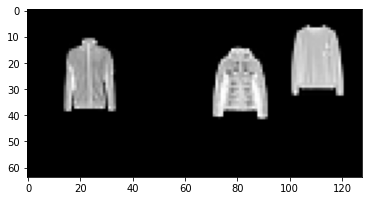

In [ ]:
# Read a pickle file and disply its samples
# Note that image data are stored as unit8 so each element is an integer value between 0 and 255
data = pickle.load( open( './Train.pkl', 'rb' ), encoding='bytes')
targets = np.genfromtxt('./TrainLabels.csv', delimiter=',')
plt.imshow(data[1234,:,:],cmap='gray', vmin=0, vmax=256)
print(data.shape)

## Dataset class
*Dataset* class and the *Dataloader* class in pytorch help us to feed our own training data into the network. Dataset class is used to provide an interface for accessing all the training or testing samples in your dataset. For your convinance, we provide you with a custom Dataset that reads the provided data including images (.pkl file) and labels (.csv file).

## Dataloader class
Although we can access all the training data using the Dataset class, for neural networks, we would need batching, shuffling, multiprocess data loading, etc. DataLoader class helps us to do this. The DataLoader class accepts a dataset and other parameters such as batch_size.

In [ ]:
# Transforms are common image transformations. They can be chained together using Compose.
# Here we normalize images img=(img-0.5)/0.5
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [ ]:
# img_file: the pickle file containing the images
# label_file: the .csv file containing the labels
# transform: We use it for normalizing images (see above)
# idx: This is a binary vector that is useful for creating training and validation set.
# It return only samples where idx is True

class MyDataset(Dataset):
    def __init__(self, img_file, label_file, transform=None, idx = None):
        self.data = pickle.load( open( img_file, 'rb' ), encoding='bytes')
        self.targets = np.genfromtxt(label_file, delimiter=',', skip_header=1)[:,1:]
        if idx is not None:
          self.targets = self.targets[idx]
          self.data = self.data[idx]
        self.transform = transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        img, target = self.data[index], int(self.targets[index])
        img = Image.fromarray(img.astype('uint8'), mode='L')

        if self.transform is not None:
           img = self.transform(img)

        return img, target

In [ ]:
# Read image data and their label into a Dataset class
dataset = MyDataset('./Train.pkl', './TrainLabels.csv',transform=img_transform, idx=None)

In [ ]:
batch_size = 256 #feel free to change it
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Read a batch of data and their labels and display them
# Note that since data are transformed, they are between [-1,1]
imgs, labels = (next(iter(dataloader)))
imgs = np.squeeze(imgs)
plt.imshow(imgs[3].cpu().numpy(),cmap='gray', vmin=-1, vmax=1) #.transpose()

In [ ]:
for data in dataloader:
    [img,label] = data
    break

In [ ]:
label

In [ ]:
# Here is a piece of code that reads data in batch.
# In each epoch all samples are read in batches using dataloader

num_epochs=2 # Feel free to change it
for epoch in range(num_epochs):
    for data in dataloader:
        [img,label] = data


In [ ]:
print(label.shape)

## CNNs
This part is heavily based on https://nextjournal.com/gkoehler/pytorch-mnist

First, we load our dataset using methods discussed above

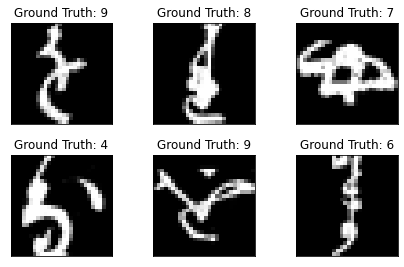

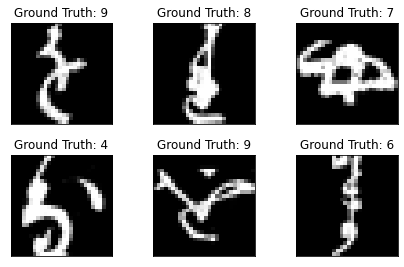

In [ ]:
from torchvision.datasets import KMNIST
import matplotlib.pyplot as plt

image_transform = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,), (0.3081,))
                  ])

train_loader = DataLoader( KMNIST('./data', train=True, download=True, transform=image_transform),batch_size=64, shuffle=True)
test_loader = DataLoader( KMNIST('./data', train=False, transform=image_transform),batch_size=64, shuffle=True)


examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Now, we have to create our network. This part is important in many aspects

In [ ]:
class Net(nn.Module):
    # This part defines the layers
    def __init__(self):
        super(Net, self).__init__()
        # At first there is only 1 channel (greyscale). The next channel size will be 10.
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # Then, going from channel size (or feature size) 10 to 20.
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        # Now let us create some feed foreward layers in the end. Remember the sizes (from 320 to 50)
        self.fc1 = nn.Linear(320, 50)
        # The last layer should have an output with the same dimension as the number of classes
        self.fc2 = nn.Linear(50, 10)

    # And this part defines the way they are connected to each other
    # (In reality, it is our foreward pass)
    def forward(self, x):


        # F.relu is ReLU activation. F.max_pool2d is a max pooling layer with n=2
        # Max pooling simply selects the maximum value of each square of size n. Effectively dividing the image size by n
        # At first, x is out input, so it is 1x28x28
        # After the first convolution, it is 10x24x24 (24=28-5+1, 10 comes from feature size)
        # After max pooling, it is 10x12x12
        # ReLU doesn't change the size
        x = F.relu(F.max_pool2d(self.conv1(x), 2))

        # Again, after convolution layer, size is 20x8x8 (8=12-5+1, 20 comes from feature size)
        # After max pooling it becomes 20x4x4
        x = F.relu(F.max_pool2d(self.conv2(x), 2))

        # This layer is an imaginary one. It simply states that we should see each member of x
        # as a vector of 320 elements, instead of a tensor of 20x4x4 (Notice that 20*4*4=320)
        x = x.view(-1, 320)

        # Feedforeward layers. Remember that fc1 is a layer that goes from 320 to 50 neurons
        x = F.relu(self.fc1(x))

        # Output layer
        x = self.fc2(x)

        # We should put an appropriate activation for the output layer.
        return F.log_softmax(x)

Let's train these. But first, create the network, the optimizer and some lists for logging the training process

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(3)]

The train and test functions. Should be familiar enough.

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target) #negative log liklhood loss
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

And let us train the network

In [ ]:
for epoch in range(1, 4):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.321314
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.253849
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.226686
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.113317
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.934579
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.480032
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.572242
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.111626
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.991025
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.286306
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.766989
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.797821
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.628602
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.672954
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.761083
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.743901
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.557410
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.522305
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.605629
Train Epoch: 1 [24320/60000 (41%)]	Loss: 0.754523
Train Epoch: 1 [

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.6526, Accuracy: 7930/10000 (79%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.304093
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.270174
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.495197
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.286902
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.244721
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.445780
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.355850
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.204792
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.398207
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.377910
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.221832
Train Epoch: 2 [14080/60000 (23%)]	Loss: 0.224926
Train Epoch: 2 [15360/60000 (26%)]	Loss: 0.229683
Train Epoch: 2 [16640/60000 (28%)]	Loss: 0.164499
Train Epoch: 2 [17920/60000 (30%)]	Loss: 0.147030
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.218383
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.350686
Train Epoch: 2 [21760/60000 (36%)]	Loss: 0.425952
Train Epoch: 2 [23040/60000 (38%)]	Loss: 0.358379
Train Ep

And see the loss curve during time

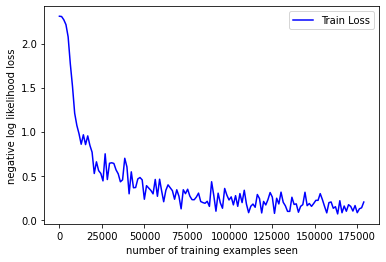

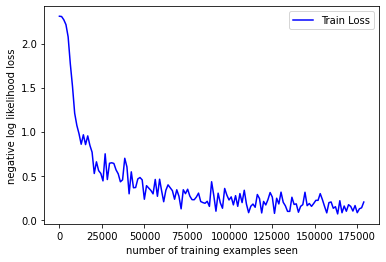

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig